## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Prepared Data Sheet

In [2]:
df = pd.read_csv('../data/exports/health_landscape_clean.csv').drop(columns=[
    'strokeDeath_rate', 'pct_diabetes_13', 'avgLifeExpec'
])

In [3]:
def fips_to_obj(df):
    df['FIPS'] = [int(i) for i in df['FIPS'].fillna(0)]
    df['FIPS'] = df['FIPS'].astype('object')
    fips_list = []
    for i in df['FIPS']:
        if len(str(i)) < 5:
            fips_list.append('0' + str(i))
        else:
            fips_list.append(str(i))
    df['FIPS'] = fips_list
    return df

df = fips_to_obj(df)

## Exploratory Data Analysis

### Correlations

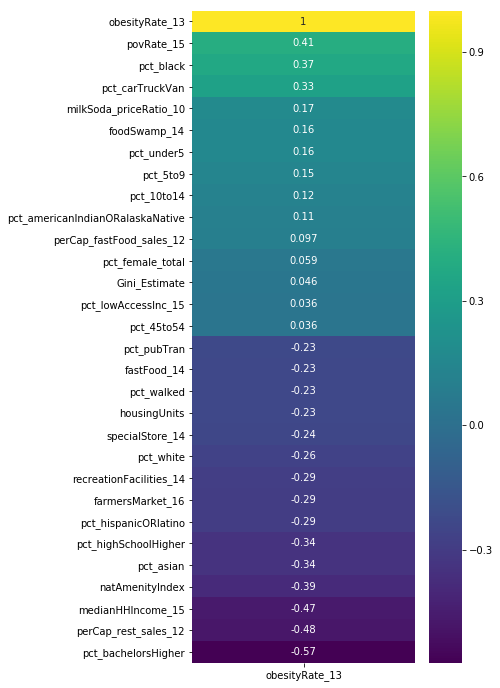

In [4]:
plt.figure(figsize=(5,12))
sns.heatmap(df.corr()[['obesityRate_13']].sort_values(by='obesityRate_13', ascending=False)\
    .iloc[np.r_[0:15, -15:0]], annot=True, cmap='viridis');

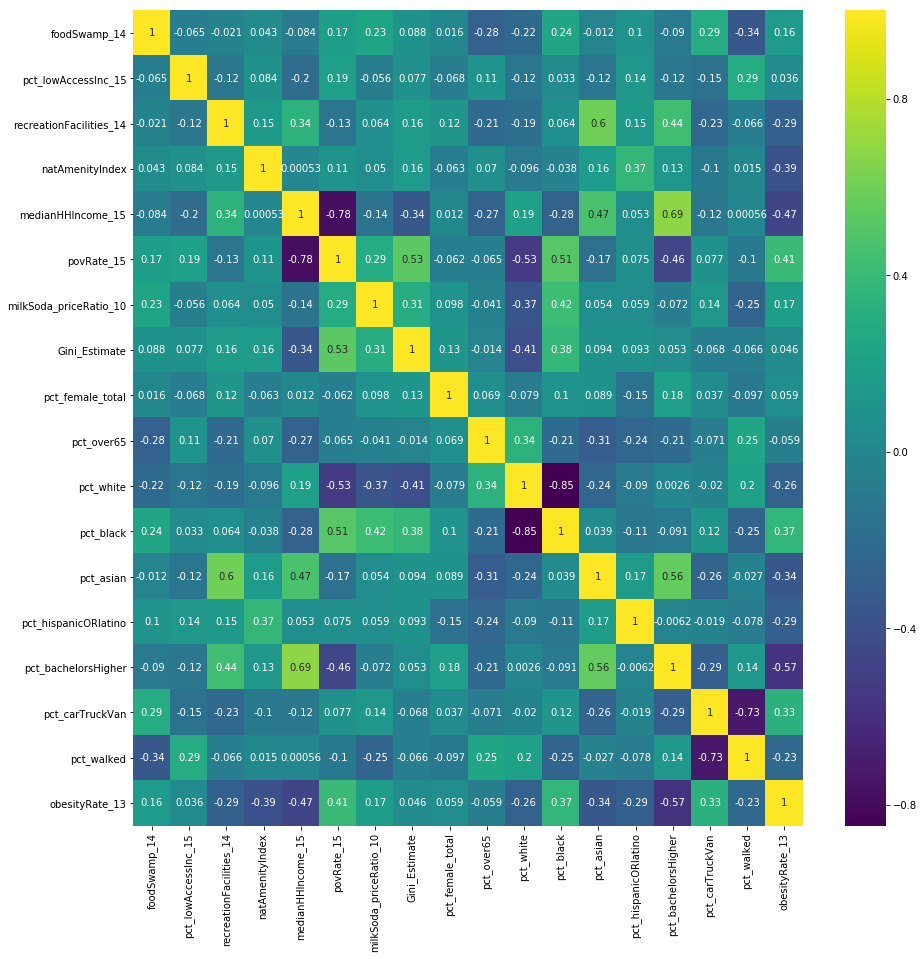

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df[[
    'foodSwamp_14','pct_lowAccessInc_15', # Food metrics
                
    'recreationFacilities_14','natAmenityIndex', # Recreation & outdoors amenities
    
    'medianHHIncome_15', 'povRate_15', 'milkSoda_priceRatio_10','Gini_Estimate', # Income, prices, wealth
    
    'pct_female_total', #Gender
    
    'pct_over65', # Age
    
    'pct_white', 'pct_black', 'pct_asian', 'pct_hispanicORlatino', # Race
        
    'pct_bachelorsHigher', # Education
    
    'pct_carTruckVan', 'pct_walked', # Transportation
    
    'obesityRate_13']]\
.corr(), annot=True, cmap='viridis');

### Row Inspection

In [6]:
df.sort_values(by='foodSwamp_14', ascending=False)[['FIPS','State','County','foodSwamp_14','fastFood_14',
    'convenienceStores_14','grocStores_14','totalArea','obesityRate_13']].iloc[0:20,:]

,FIPS,State,County,foodSwamp_14,fastFood_14,convenienceStores_14,grocStores_14,totalArea,obesityRate_13
360,13011,GA,Banks,26.000000,14.0,12.0,0.0,233.89,27.0
400,13093,GA,Dooly,25.000000,6.0,19.0,0.0,397.28,34.7
355,13001,GA,Appling,24.000000,13.0,11.0,1.0,512.26,34.8
1089,22049,LA,Jackson,23.000000,9.0,14.0,1.0,580.28,34.8
1083,22037,LA,East Feliciana,22.000000,11.0,11.0,1.0,455.78,42.1
2491,48053,TX,Burnet,21.666667,28.0,37.0,3.0,1021.26,30.0
2448,47153,TN,Sequatchie,20.000000,12.0,8.0,0.0,266.04,28.3
2148,40145,OK,Wagoner,20.000000,31.0,29.0,2.0,590.68,33.5
2775,51037,VA,Charlotte,18.000000,3.0,15.0,1.0,477.52,33.5
2669,48415,TX,Scurry,17.500000,21.0,14.0,2.0,907.54,26.2


## Colinearity
Poverty, Median Household Income, Education: Bachelors or Higher

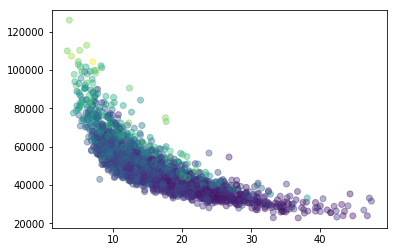

In [7]:
plt.scatter(x=df['povRate_15'], y=df['medianHHIncome_15'], c=df['pct_bachelorsHigher'], cmap='viridis', alpha=.4);

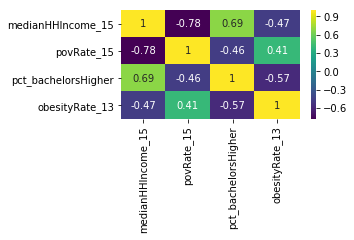

In [8]:
plt.figure(figsize=(4,2))
sns.heatmap(df[[
    'medianHHIncome_15', 'povRate_15', 'pct_bachelorsHigher', 'obesityRate_13']]\
.corr(),
            annot=True, cmap='viridis');

### Pairplot Visualizations

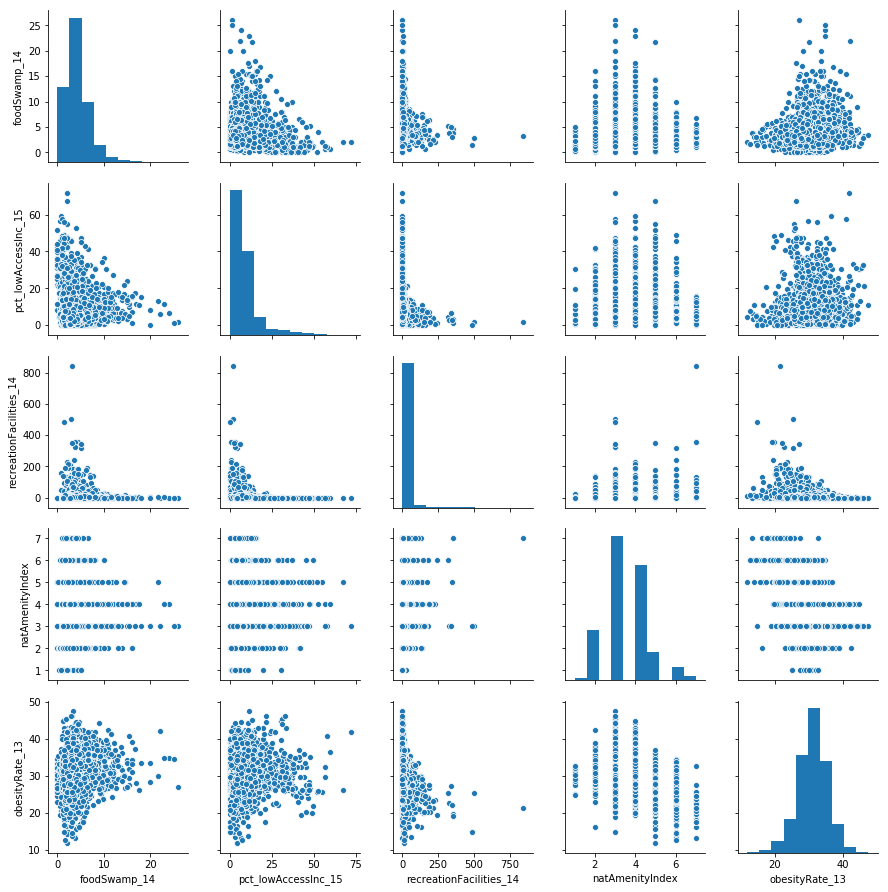

In [9]:
sns.pairplot(df[['foodSwamp_14', 'pct_lowAccessInc_15','recreationFacilities_14',
                 'natAmenityIndex','obesityRate_13']]);

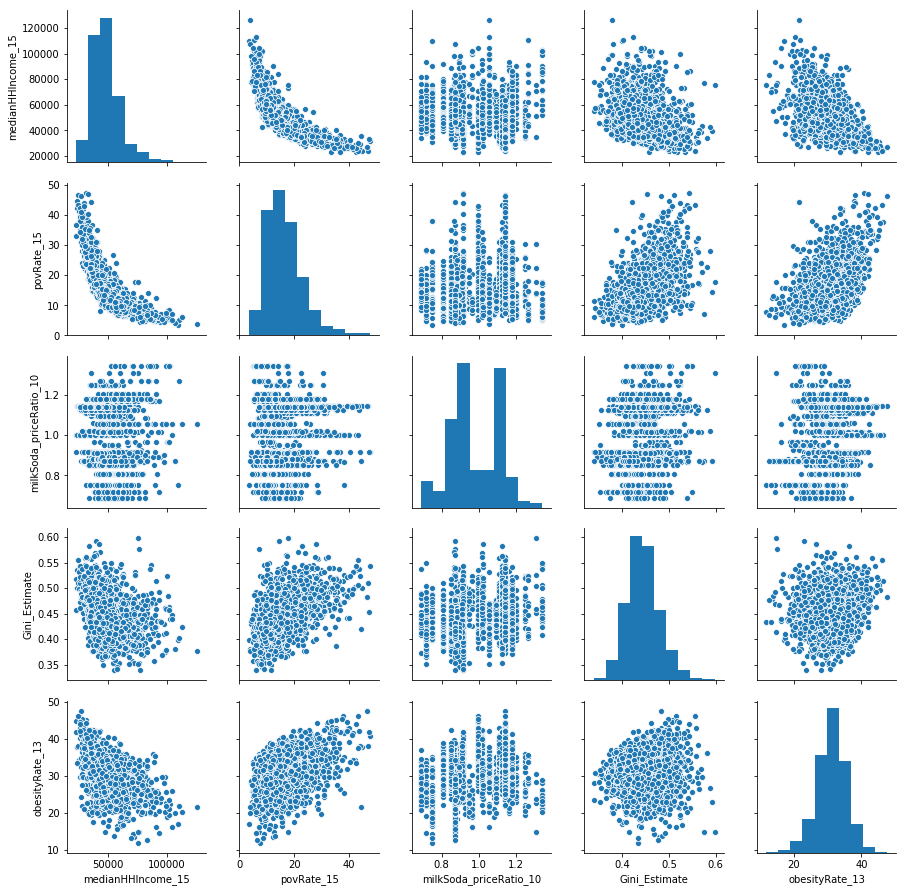

In [10]:
sns.pairplot(df[['medianHHIncome_15', 'povRate_15', 'milkSoda_priceRatio_10',
                 'Gini_Estimate','obesityRate_13']]);

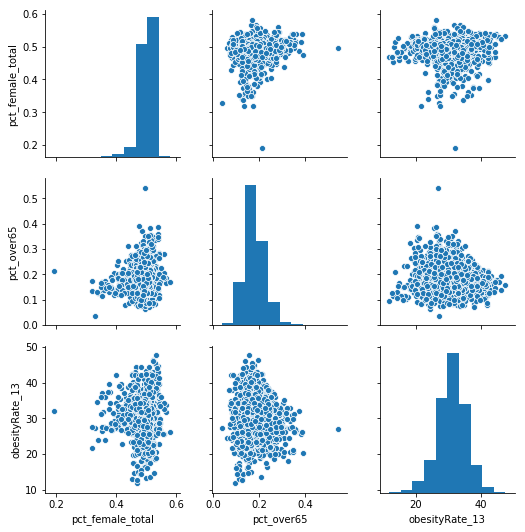

In [11]:
sns.pairplot(df[['pct_female_total','pct_over65','obesityRate_13']]);

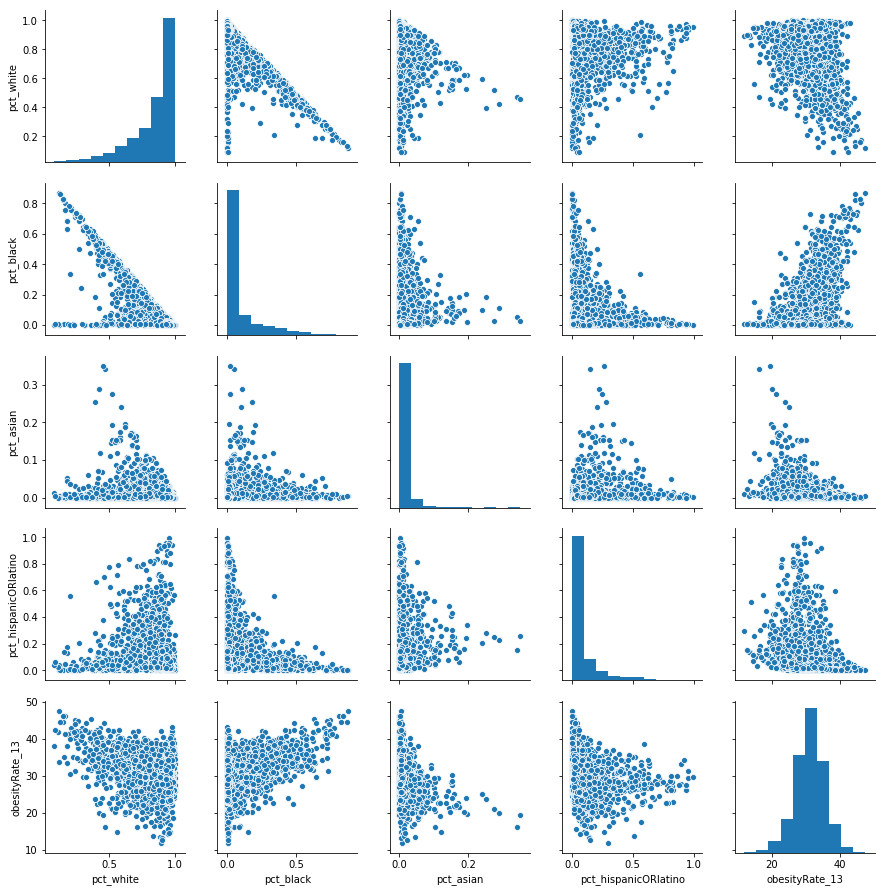

In [12]:
sns.pairplot(df[['pct_white', 'pct_black', 'pct_asian', 'pct_hispanicORlatino','obesityRate_13']]);

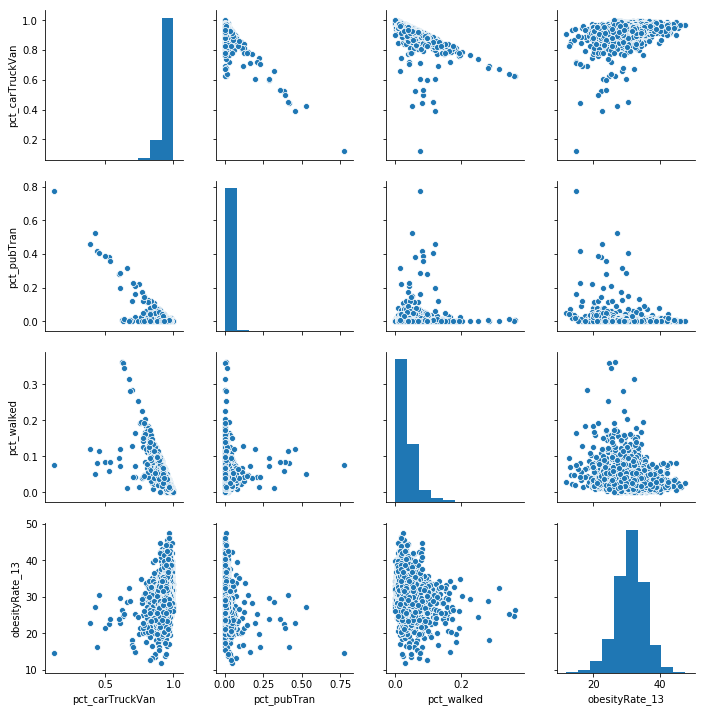

In [13]:
sns.pairplot(df[['pct_carTruckVan', 'pct_pubTran', 'pct_walked','obesityRate_13']]);